# Getting started

In [1]:
# Load libraries
import numpy as np
import matplotlib.pylab as py

## Generating data

In [2]:
# Generate data
number_of_points = 10
x = np.random.uniform(0, 1, size=number_of_points)

true_a = 1.0
true_b = 0.5

mu = 0.0
sigma = 0.1
noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

y = true_a*x + true_b + noise


In [3]:
print(x)
print(y)

[0.35317162 0.98292281 0.61611935 0.09555447 0.57388251 0.50614479
 0.62940125 0.73902394 0.24919582 0.47422807]
[0.70825445 1.33787871 1.01759014 0.57214417 1.16064583 1.01701603
 1.18234642 1.18586204 0.69244406 1.01107869]


## Our first plot

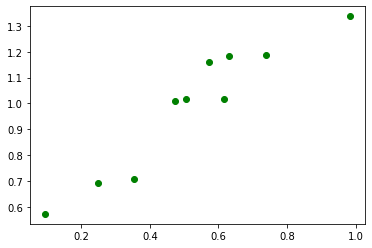

In [4]:
py.scatter(x, y, color='green')

## Which I have already messed up :-)

I don't want a dear friend getting mad at me...  So I need to label my axes!

![Rick Brown](https://www.wpi.edu/sites/default/files/faculty-image/drb_0.jpg?1641483676061)

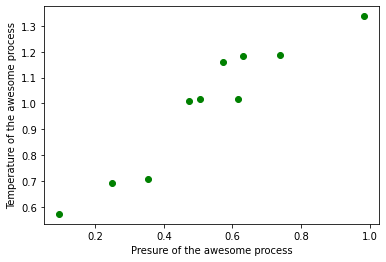

In [5]:
py.scatter(x, y, color='green')
py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

# Making a hypothesis  

Here we do some some **math**!  

Well not really, but that is the point of this class :-)

In [6]:
deg = 1

# Lots of math magic in here!
z = np.polyfit(x, y, deg=deg)
y_hat_function = np.poly1d(z)


## I can now save lab time

In [7]:
# What I am really interested in.  I have never done this example and I 
# want to same time by not doing the experiment!
x_interested = 0.9
y_hat_interested = y_hat_function(x_interested)
print(f'For a pressure of {x_interested} I predict a temperature of {y_hat_interested}')


For a pressure of 0.9 I predict a temperature of 1.3470012278615735


## A nice plot... but am I done?

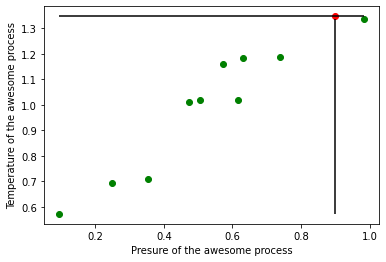

In [8]:
py.scatter(x, y, color='green')
py.hlines(y_hat_interested, xmin=min(x), xmax=max(x))
py.vlines(x_interested, ymin=np.min(y), ymax=max(y))
py.scatter(x_interested, y_hat_interested, color='red')
py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## No! 
I don't know if I ***trust*** the answer.  Perhaps I actually need to do the experiment!?

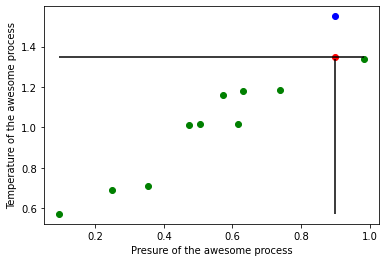

In [9]:
y_from_new_experiment = 1.55

py.scatter(x, y, color='green')
py.scatter(x_interested, y_hat_interested, color='red')
py.scatter(x_interested, y_from_new_experiment, color='blue')
py.hlines(y_hat_interested, xmin=min(x), xmax=max(x))
py.vlines(x_interested, ymin=np.min(y), ymax=max(y))
py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

# Training versus testing

![My happy face](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/SNice.svg/1024px-SNice.svg.png)

## Not all errors are created equal

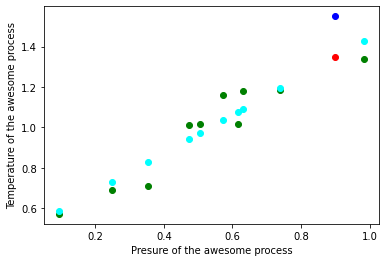

In [10]:
y_from_new_experiment = 1.55
y_training_predictions = y_hat_function(x)

py.scatter(x, y, color='green')
py.scatter(x, y_training_predictions, color='cyan')

py.scatter(x_interested, y_hat_interested, color='red')
py.scatter(x_interested, y_from_new_experiment, color='blue')

py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

## This is why we call this linear regression

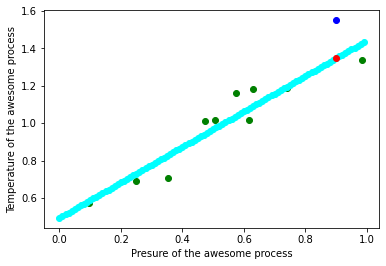

In [11]:
y_from_new_experiment = 1.55

#y_training_predictions = y_hat_function(x)
x_on_grid = np.arange(0,1,0.01)
y_predictions_on_grid = y_hat_function(x_on_grid)

py.scatter(x, y, color='green')
py.scatter(x_on_grid, y_predictions_on_grid, color='cyan')

py.scatter(x_interested, y_hat_interested, color='red')
py.scatter(x_interested, y_from_new_experiment, color='blue')

py.xlabel('Presure of the awesome process')
py.ylabel('Temperature of the awesome process');

# Better Python code

I am tired of typing so much, so let's make a function

In [12]:
def generate_data(number_of_points = 10, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.1):
  x = np.random.uniform(0, 1, size=number_of_points)

  true_a = 1.0
  true_b = 0.5

  mu = 0.0
  sigma = sigma
  noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

  y = true_a*x + true_b + noise
  return x,y

def create_model(x, y):
  deg = 1

  # Lots of math magic in here!
  z = np.polyfit(x, y, deg=deg)
  y_hat_function = np.poly1d(z)
  return y_hat_function

def evaluate_model(model, x_train, y_train, x_test, y_test):
  py.scatter(x_train, y_train, color='green')
  py.scatter(x_train, model(x_train), color='cyan')

  py.scatter(x_test, y_test, color='red')
  py.scatter(x_test, model(x_test), color='blue')

  py.xlabel('Presure of the awesome process')
  py.ylabel('Temperature of the awesome process');

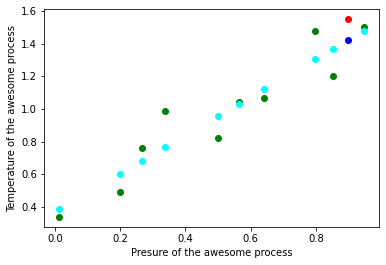

In [13]:
x_train, y_train = generate_data(number_of_points = 10, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.1)
model = create_model(x_train, y_train)
evaluate_model(model, x_train, y_train, x_test=[0.9], y_test=[1.55])

More advanced

In [56]:
def generate_data(number_of_points = 10, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.1, degree=1):
  x = np.random.uniform(-1, 1, size=number_of_points)

  true_a = 1.0
  true_b = 0.5

  mu = 0.0
  sigma = sigma
  noise = np.random.normal(loc=mu, scale=sigma, size=number_of_points)

  y = true_a*x**degree + true_b + noise

  return x,y

def create_model(x, y, degree=1):
  # Lots of math magic in here!
  z = np.polyfit(x, y, deg=degree)
  y_hat_function = np.poly1d(z)
  return y_hat_function

def evaluate_model(model, x_train, y_train, x_test, y_test):
  py.scatter(x_train, y_train, color='green')
  py.scatter(x_train, model(x_train), color='cyan')

  py.scatter(x_test, y_test, color='red')
  py.scatter(x_test, model(x_test), color='blue')

  x_on_grid = np.arange(min([min(x_train), min(x_test)]), max([max(x_train), max(x_test)]), 0.01)
  y_predictions_on_grid = model(x_on_grid)

  py.plot(x_on_grid, y_predictions_on_grid)

  py.xlabel('Presure of the awesome process')
  py.ylabel('Temperature of the awesome process');

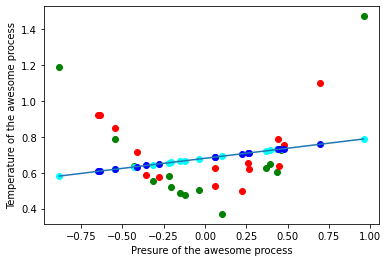

In [98]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.05, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=1)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

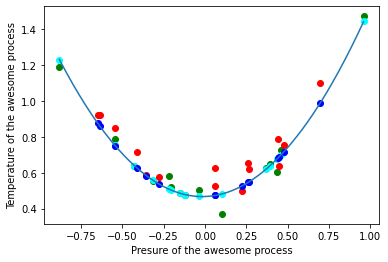

In [99]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.05, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=2)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

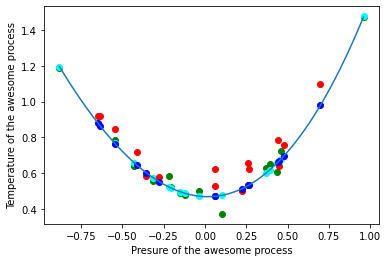

In [100]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.05, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=3)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)

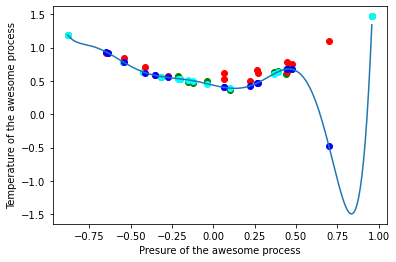

In [106]:
np.random.seed(123)
number_of_points = 30
x, y = generate_data(number_of_points = number_of_points, true_a = 1.0, true_b = 0.5, mu = 0.0, sigma = 0.05, degree=2)

test_size = 15
x_train = x[:(number_of_points-test_size)]
y_train = y[:(number_of_points-test_size)]

x_test = x[(number_of_points-test_size):]
y_test = y[(number_of_points-test_size):]

model = create_model(x_train, y_train, degree=8)
evaluate_model(model, x_train, y_train, x_test=x_test, y_test=y_test)